# Principal Component Analysis (PCA)

Link to the Youtube tutorial video: https://www.youtube.com/watch?v=8klqIM9UvAc&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=20

1) **Hightlights**:
    1) PCA is an unsupervised machine learning algorithm.  <br />  
    2) PCA is called dimensionality reduction technique as it can help us reduce dimensions.  <br />
    3) PCA is a process of figuring out most important features or principal components that have the most impact on the target (dependent) variable.  <br />  

2) **Theory behind PCA**:
    1) We take the SKlearn handwritten image dataset as example. The dataset consists of 64 features. Here, we only plot 2 of the features, called corner pixel and central pixel. These clusters represent different digits. You immediately notice that the corner pixel is not playing an important role. The maximum variance (OR maximum variance) is on the y-axis, which is a central pixel.  <br />
    <img src="hidden\photo1.png" alt="This image describes PCA, part 1" style="width: 400px;"/>  <br />

    2) If you are asked to reduce this two-dimension into one-dimension, you can easily do so by getting rid of corner pixel, getting the one-dimensional graph shown on right hand side.  <br />
        <img src="hidden\photo2.png" alt="This image describes PCA, part 2" style="width: 400px;"/>  <br />

    3) Let's look at the SKlearn iris dataset. If you have a scatterplot as below, you can draw a line (principal component 1, PC1) which covers the maximum variance (OR maximum information in terms of features). Then, you can draw a perpendicular line (principal component 2, PC2) which covers the second most variance. Each principal component is an axis. If there are multiple principal components calculated/drawn/extracted from the dataset, PC1 covers the most variance (most information) in terms of features of the dataset, followed by PC2, PC3, ... <br />
        <img src="hidden\photo3.png" alt="This image describes PCA, part 3" style="width: 400px;"/>  <br />

3) **Things to keep in mind before using PCA**:
    1) You need to scale the features before applying PCA on them to perform dimensionality reduction. Else, PCA will not work as per your expectation.
    2) Accuracy might drop if you use the principal components to train your machine learning model, instead the original features of the dataset.  <br /> 
        <img src="hidden\photo4.png" alt="This image describes PCA, part 4" style="width: 400px;"/>  <br />

# Load the dataset

In [279]:
import pandas as pd
from sklearn.datasets import load_digits

dataset = load_digits()

# Data exploration

In [280]:
# check the attributes of the dataset
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [281]:
# check the shape of the data attribute of the dataset. The data attribute contains the independent variables (features) of the dataset.
print('The dataset consists of '+str(dataset.data.shape[0])+' samples/rows, while each sample consists of '+str(dataset.data.shape[1])+' features/colums.')


The dataset consists of 1797 samples/rows, while each sample consists of 64 features/colums.


In [282]:
# show the features of the 1st sample of the dataset, in 1D array format
print('The features of the 1st sample of the dataset:\n', dataset.data[0])

# show the features of the 1st sample of the dataset, in 2D array format
print('The features of the 1st sample of the dataset:\n', dataset.data[0].reshape(8,8))

The features of the 1st sample of the dataset:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
The features of the 1st sample of the dataset:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

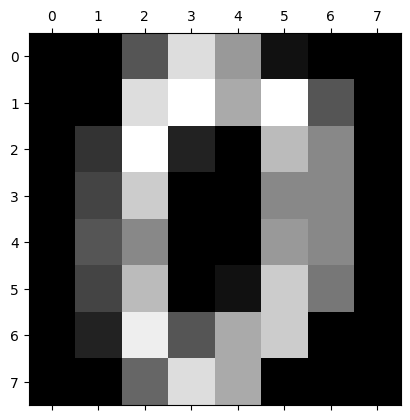

In [283]:
# plot the actual image of the 1st sample of the dataset
from matplotlib import pyplot as plt
%matplotlib inline

# set the colorspace of the figure window to gray
plt.gray()

# plot the actual image of the sample 
plt.matshow(dataset.data[0].reshape(8,8))

In [284]:
# show the data (labels/classes) available in the target attribute of the dataset. The target attribute contains the dependent variable (target) of the dataset.
print(dataset.target)

# show all the possible label/class names in the target attribute of the dataset 
import numpy as np
print('The possible label names of the dataset:\n',np.unique(dataset.target))

[0 1 2 ... 8 9 8]
The possible label names of the dataset:
 [0 1 2 3 4 5 6 7 8 9]


In [285]:
'''
For the column name of pixel_X_Y, X represents the number of rows while 
Y represents the number of columns where the pixel is located. 
Since the dataset consists of 8x8 images, 
the column names of the dataset range from (X=0,Y=0) to (X=7,Y=7).
'''

# create a dataframe called df, which consists of the features of the dataset
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# show the first 5 rows of the df dataframe
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [286]:
'''
The last row of the output shows the maximum value of each entry of each column is 16. This is because in gray colorspace, pixel value of 16 represents the white color, pixel value of 0 represents the black color.
'''

# show the statistics of values of each column of the df dataframe
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


# Data preprocessing

In [287]:
# store the independent variables (features) of the dataset to X variable
X = df

# store the dependent variable of the dataset to Y variable
Y = dataset.target

### Scale each feature of the dataset using StandardScaler

1) Features scaling is a common thing to do before training a machine learning model
2) If the scale of features of the dataset used to train a machine learning model is not correct (EG: If a machine learning model is trained with only 2 features, scale of the feature represented by x-axis is different with the scale of the feature represented by y-axis), the machine learning model cannot predict the new samples/data points correctly. 
3) Hence, we must scale the features of the dataset (which used to train the machine learning model) [Here, are the 64 columns available in the data attribute of the dataset] before training the model and use the model to make predictions, so that the model can predict the new samples/data points correctly.

In [288]:
from sklearn.preprocessing import StandardScaler

# create a scaler with the StandardScaler
scaler = StandardScaler()

'''
**make the scale of the features available in the data attribute of the dataset into the range from 0 to 1 (so after the scaling for the features is done, you will have a scale of 0 to 1 for each of the features)**
With fit_transform(), the StandardScaler first learns how to scale the features of the dataset (by calculating the mean and standard deviation for each feature).
Then scales (transforms) the data (each entry of the feature columns, available in X dataframe) into a more suitable form (in the range from 0 to 1), according to the mean and standard deviation calculated during the fit() step. 
The scaled features are stored in the X_scaled variable. 
'''
X_scaled = scaler.fit_transform(X)

# show the scaled features in the format of dataframe
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


# Develop the machiner learning model (Logistic regression model)

## Without dimensionality reduction using PCA

### Develop the machine learning model

In [289]:
from sklearn.model_selection import train_test_split

# split the dataset into train and test sets using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=30)


from sklearn.linear_model import LogisticRegression

# create the logistic regression model
model_withoutPCA = LogisticRegression()

# train the model
model_withoutPCA.fit(X_train,Y_train)

# show the accuracy of the trained model
print('The accuracy of the trained model: ',model_withoutPCA.score(X_test,Y_test))

The accuracy of the trained model:  0.9722222222222222


## With dimensionality reduction using PCA

The independent variables (features) provided to the PCA model for dimensionality reduction must not be scaled (means must be original)

### With percentage of variance as argument

#### Develop the PCA model

In [290]:
from sklearn.decomposition import PCA

'''
create the PCA model, with the percentage of variance (variation) as argument. 
The 0.95 argument tells the PCA model to retain 95% of features (variation) of the dataset, and then use them to create new dimensions (principal components).
'''
pca_percent = PCA(0.95)

'''
With fit_transform(), the PCA model first learns the features of the dataset.
Then, it reduces (transforms) the available features of the dataset into the percentage you specified. In other words, it retains the percentage of features you specified.
The PCA model then transforms the retained features into principal components (features created by PCA model) in the form of dataframe, before saving it to X_pca variable.
'''
X_pca_percent = pca_percent.fit_transform(X_scaled)

print('The X dataframe (the dataframe consists of all features of the dataset) consists of '+ str(X.shape[1]) +' features/columns for the ' +str(X.shape[0])+' samples of the dataset.')
print('After dimensionality reduction using PCA, the X_pca dataframe consists of '+ str(X_pca_percent.shape[1]) +' principal components/features created by the PCA model/columns for the ' +str(X_pca_percent.shape[0])+' samples of the dataset.')
print('This means the PCA model reduced the features of the dataset from '+ str(X.shape[1]) +' (original features of the dataset) to '+ str(X_pca_percent.shape[1]) + ' (newly computed features by the PCA model).')

The X dataframe (the dataframe consists of all features of the dataset) consists of 64 features/columns for the 1797 samples of the dataset.
After dimensionality reduction using PCA, the X_pca dataframe consists of 40 principal components/features created by the PCA model/columns for the 1797 samples of the dataset.
This means the PCA model reduced the features of the dataset from 64 (original features of the dataset) to 40 (newly computed features by the PCA model).


#### Show the outputs from the PCA model

In [291]:
print('The number of principal components (features created by the PCA model) available: ', pca_percent.n_components_)

'''
**show the percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model**
The first value represents the percentage of variance for the 1st principal component. 
The output shows the PCA model captured the data of 1st principal component consists of 14.9% of variance.
'''
print('The percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model:\n', pca_percent.explained_variance_ratio_)

The number of principal components (features created by the PCA model) available:  40
The percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model:
 [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163]


#### Develop the machine learning model

In [292]:
# split the dataset into train and test sets using train_test_split
X_train_pca_percent, X_test_pca_percent, Y_train_pca_percent, Y_test_pca_percent = train_test_split(X_pca_percent, Y, test_size=0.2, random_state=30)

# create the logistic regression model. max_iter=1000 is set here to prevent lbfgs failed to converge warning (in other words, this warning means the gradient descent cannot converge to find the minima. the optimal parameters)
model_pca_percent = LogisticRegression(max_iter=1000)

# train the model
model_pca_percent.fit(X_train_pca_percent,Y_train_pca_percent)

# show the accuracy of the trained model
print('The accuracy of the trained model: ',model_pca_percent.score(X_test_pca_percent,Y_test_pca_percent))

# the accuracy here shows that despite dropping lots of features, the accuracy of the model trained with reduced features is similar to the one trained witl original features without dimensionality reduction.

The accuracy of the trained model:  0.9638888888888889


### With number of principal components as argument

#### Develop the PCA model

In [293]:
'''
create the PCA model, with the number of principal components as argument. 
The 2 argument tells the PCA model to compute/generate 2 principal components based on all the features available in the dataset.
'''
pca_ncomp = PCA(n_components=2)

'''
With fit_transform(), the PCA model first learns the features of the dataset
Then reduces (transforms) the available features into the number of principal components you specified. 
In other words, it generates the number of principal components you specified, in the format of dataframe before saving it to X_pca variable.
'''
X_pca_ncomp = pca_ncomp.fit_transform(X_scaled)

print('The X dataframe (the dataframe consists of all features of the dataset) consists of '+ str(X.shape[1]) +' features/columns for the ' +str(X.shape[0])+' samples of the dataset.')
print('After dimensionality reduction using PCA, the X_pca dataframe consists of '+ str(X_pca_ncomp.shape[1]) +' principal components/features created by the PCA model/columns for the ' +str(X_pca_ncomp.shape[0])+' samples of the dataset.')
print('This means the PCA model reduced the features of the dataset from '+ str(X.shape[1]) +' (original features of the dataset) to '+ str(X_pca_ncomp.shape[1]) + ' (newly computed features by the PCA model).')

The X dataframe (the dataframe consists of all features of the dataset) consists of 64 features/columns for the 1797 samples of the dataset.
After dimensionality reduction using PCA, the X_pca dataframe consists of 2 principal components/features created by the PCA model/columns for the 1797 samples of the dataset.
This means the PCA model reduced the features of the dataset from 64 (original features of the dataset) to 2 (newly computed features by the PCA model).


#### Show the outputs from the PCA model

In [294]:
print('The number of principal components (features created by the PCA model) available: ', pca_ncomp.n_components_)

'''
**show the percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model**
The first value represents the percentage of variance for the 1st principal component. 
The output shows the PCA model captured the data of 1st principal component consists of 14.9% of variance.
'''
print('The percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model:\n', pca_ncomp.explained_variance_ratio_)

The number of principal components (features created by the PCA model) available:  2
The percentage of variance (variation/useful information) of each principal component captured/calculated by the PCA model:
 [0.12033916 0.09561054]


#### Develop the machine learning model

In [295]:
# split the dataset into train and test sets using train_test_split
X_train_pca_ncomp, X_test_pca_ncomp, Y_train_pca_ncomp, Y_test_pca_ncomp = train_test_split(X_pca_ncomp, Y, test_size=0.2, random_state=30)

# create the logistic regression model. max_iter=1000 is set here to prevent lbfgs failed to converge warning (in other words, this warning means the gradient descent cannot converge to find the minima. the optimal parameters)
model_pca_ncomp = LogisticRegression(max_iter=1000)

# train the model
model_pca_ncomp.fit(X_train_pca_ncomp,Y_train_pca_ncomp)

# show the accuracy of the trained model
print('The accuracy of the trained model: ',model_pca_ncomp.score(X_test_pca_ncomp,Y_test_pca_ncomp))

# the accuracy here shows that by specifying the n_components to PCA, you will face the problem that too many useful features are discarded such that the accuracy is lower thant the one trained with PCA specified with percentage of variance.
# However, the benefit of specifying the n_components to PCA is you improves the speed. (Tradeoff: Accureacy decreases, speed increases)

The accuracy of the trained model:  0.5666666666666667
